<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Lung Cancer Prediction - Team 2</p>

<p style="font-family:computermodern, sans-serif;
          color:F8FAFC7;
          font-size:180%;
          text-align:center;
          font-weight:bold;
          margin-top:30px;
          line-height:
    EDWARD THIAN JIA MING<br>
    PAT YOON XIN<br> JIA MING
</p>NG
</p>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
ml_accuracies = dict()

colors = ['lightcoral',
          'brown',
          'lightseagreen',
          'maroon',
          'deeppink',
          'darkorange',
          'royalblue',
          'darkviolet',
          'gold',
          'crimson',
          'lightsteelblue',
          'salmon',
          'mediumseagreen',
          'olivedrab',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'violet',
          'cyan']

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Importing Dataset & Data Wrangling</p>


In [14]:
df = pd.read_csv("cancer_patient_data_sets.csv", index_col='index')
display(df)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


In [16]:
print(df.columns)

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [18]:
round(df.describe().iloc[1:, ].T, 3)

,mean,std,min,25%,50%,75%,max
Age,37.174,12.005,14.0,27.75,36.0,45.0,73.0
Gender,1.402,0.491,1.0,1.00,1.0,2.0,2.0
Air Pollution,3.840,2.030,1.0,2.00,3.0,6.0,8.0
Alcohol use,4.563,2.620,1.0,2.00,5.0,7.0,8.0
Dust Allergy,5.165,1.981,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,4.840,2.108,1.0,3.00,5.0,7.0,8.0
Genetic Risk,4.580,2.127,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,4.380,1.849,1.0,3.00,4.0,6.0,7.0
Balanced Diet,4.491,2.136,1.0,2.00,4.0,7.0,7.0
Obesity,4.465,2.125,1.0,3.00,4.0,7.0,7.0


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood         1000

In [22]:
df.drop_duplicates()
df.isna().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [28]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
print('Cancer Levels: ', df['Level'].unique())
map = {'High': 2, 'Medium': 1, 'Low': 0}
df["Level"].replace(map, inplace=True)
print('Cancer Levels: ', df['Level'].unique())

Cancer Levels:  [0 1 2]
Cancer Levels:  [0 1 2]


In [26]:
df.drop(columns=['Patient Id'], inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2


<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Data Visualization</p>


In [30]:
X = df.drop(columns='Level')
y = df.Level

display(X.head())
print(y[:5])

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
Name: Level, dtype: int64


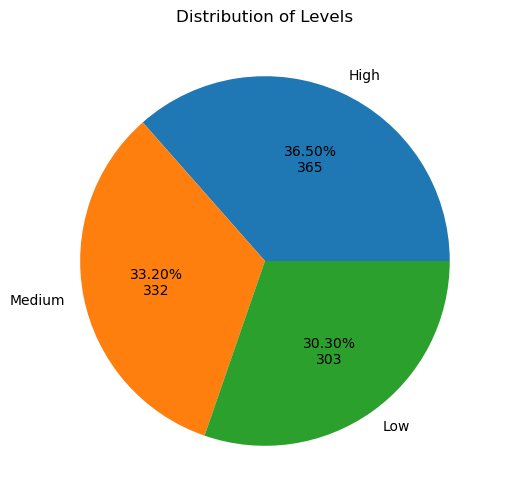

In [32]:
plt.figure(figsize=(10,6))
plt.pie(df['Level'].value_counts(), 
        labels=map.keys(), 
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df['Level'].value_counts()) / 100))
plt.title('Distribution of Levels')
plt.show()

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Correlation Plot</p>


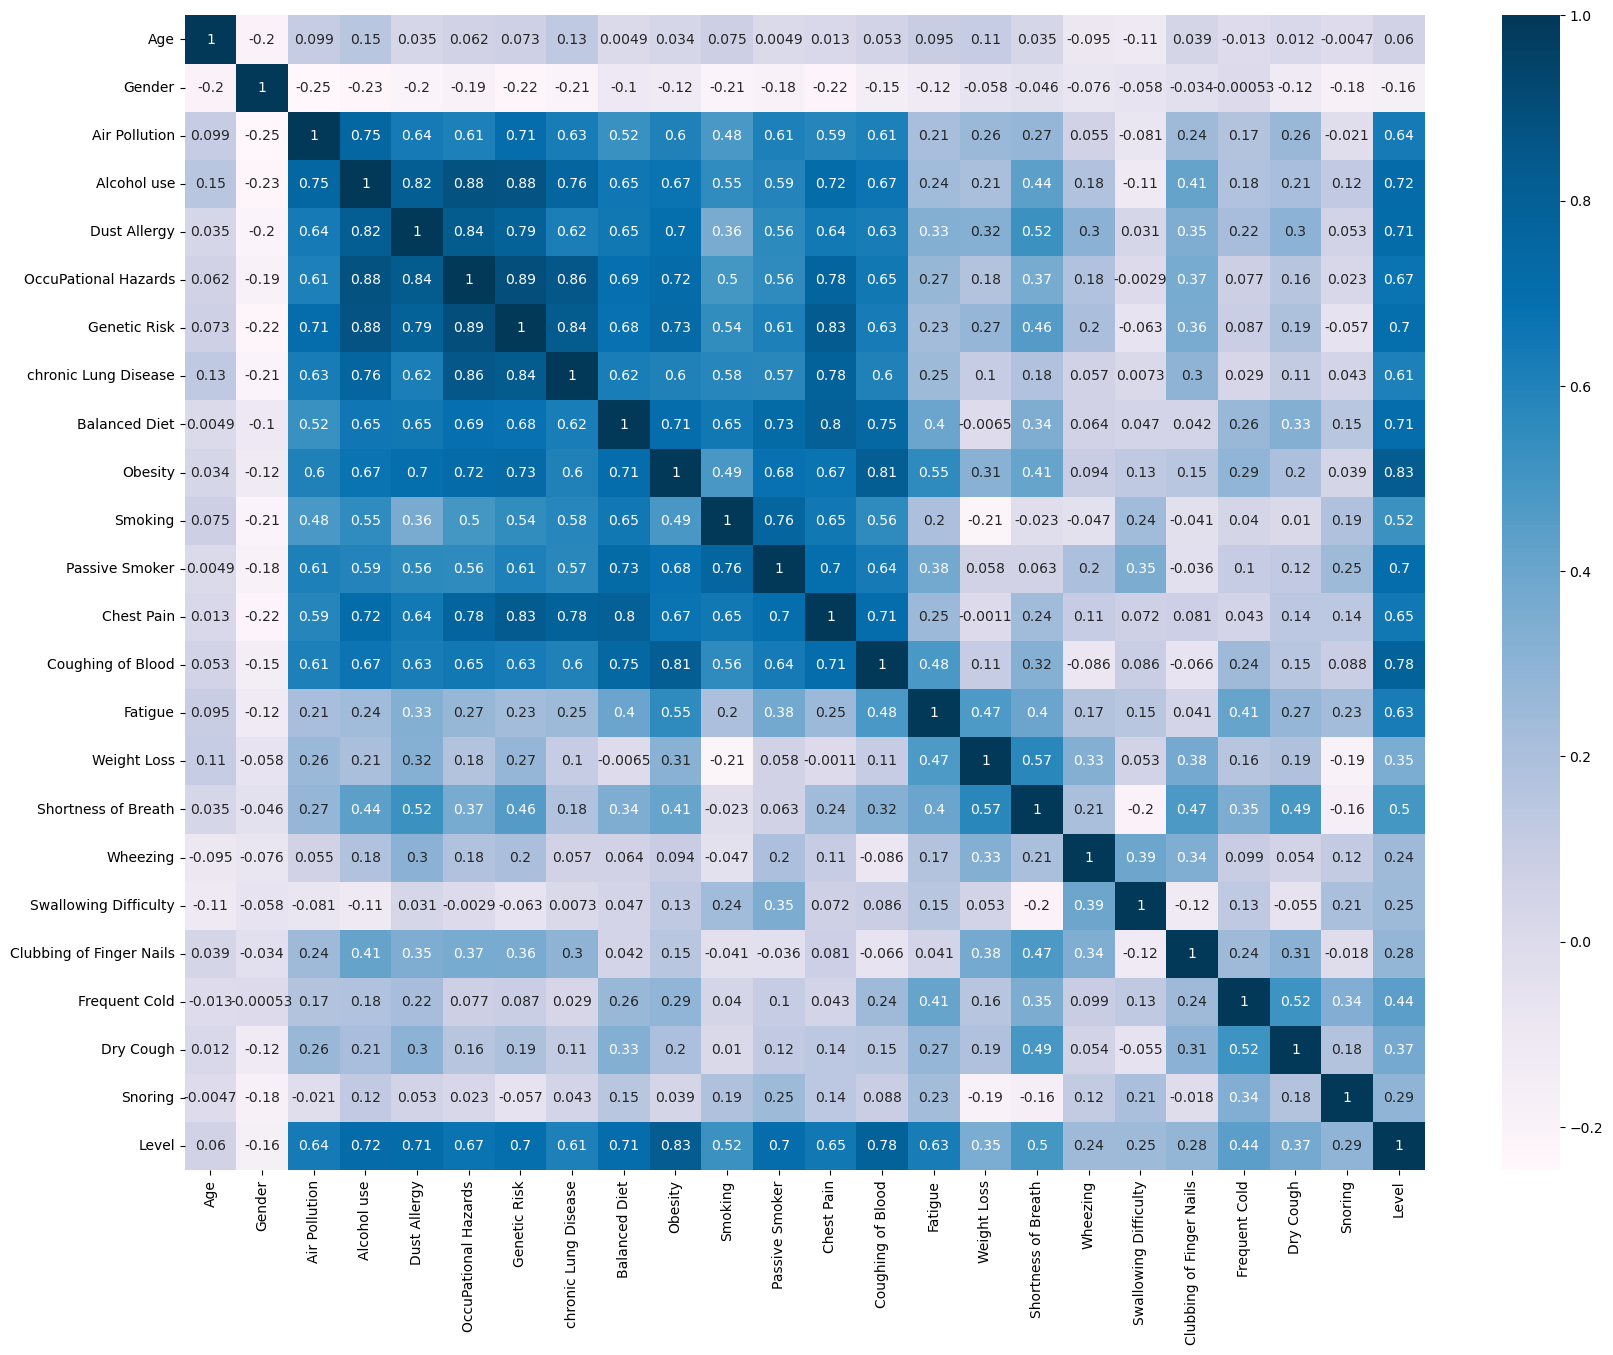

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

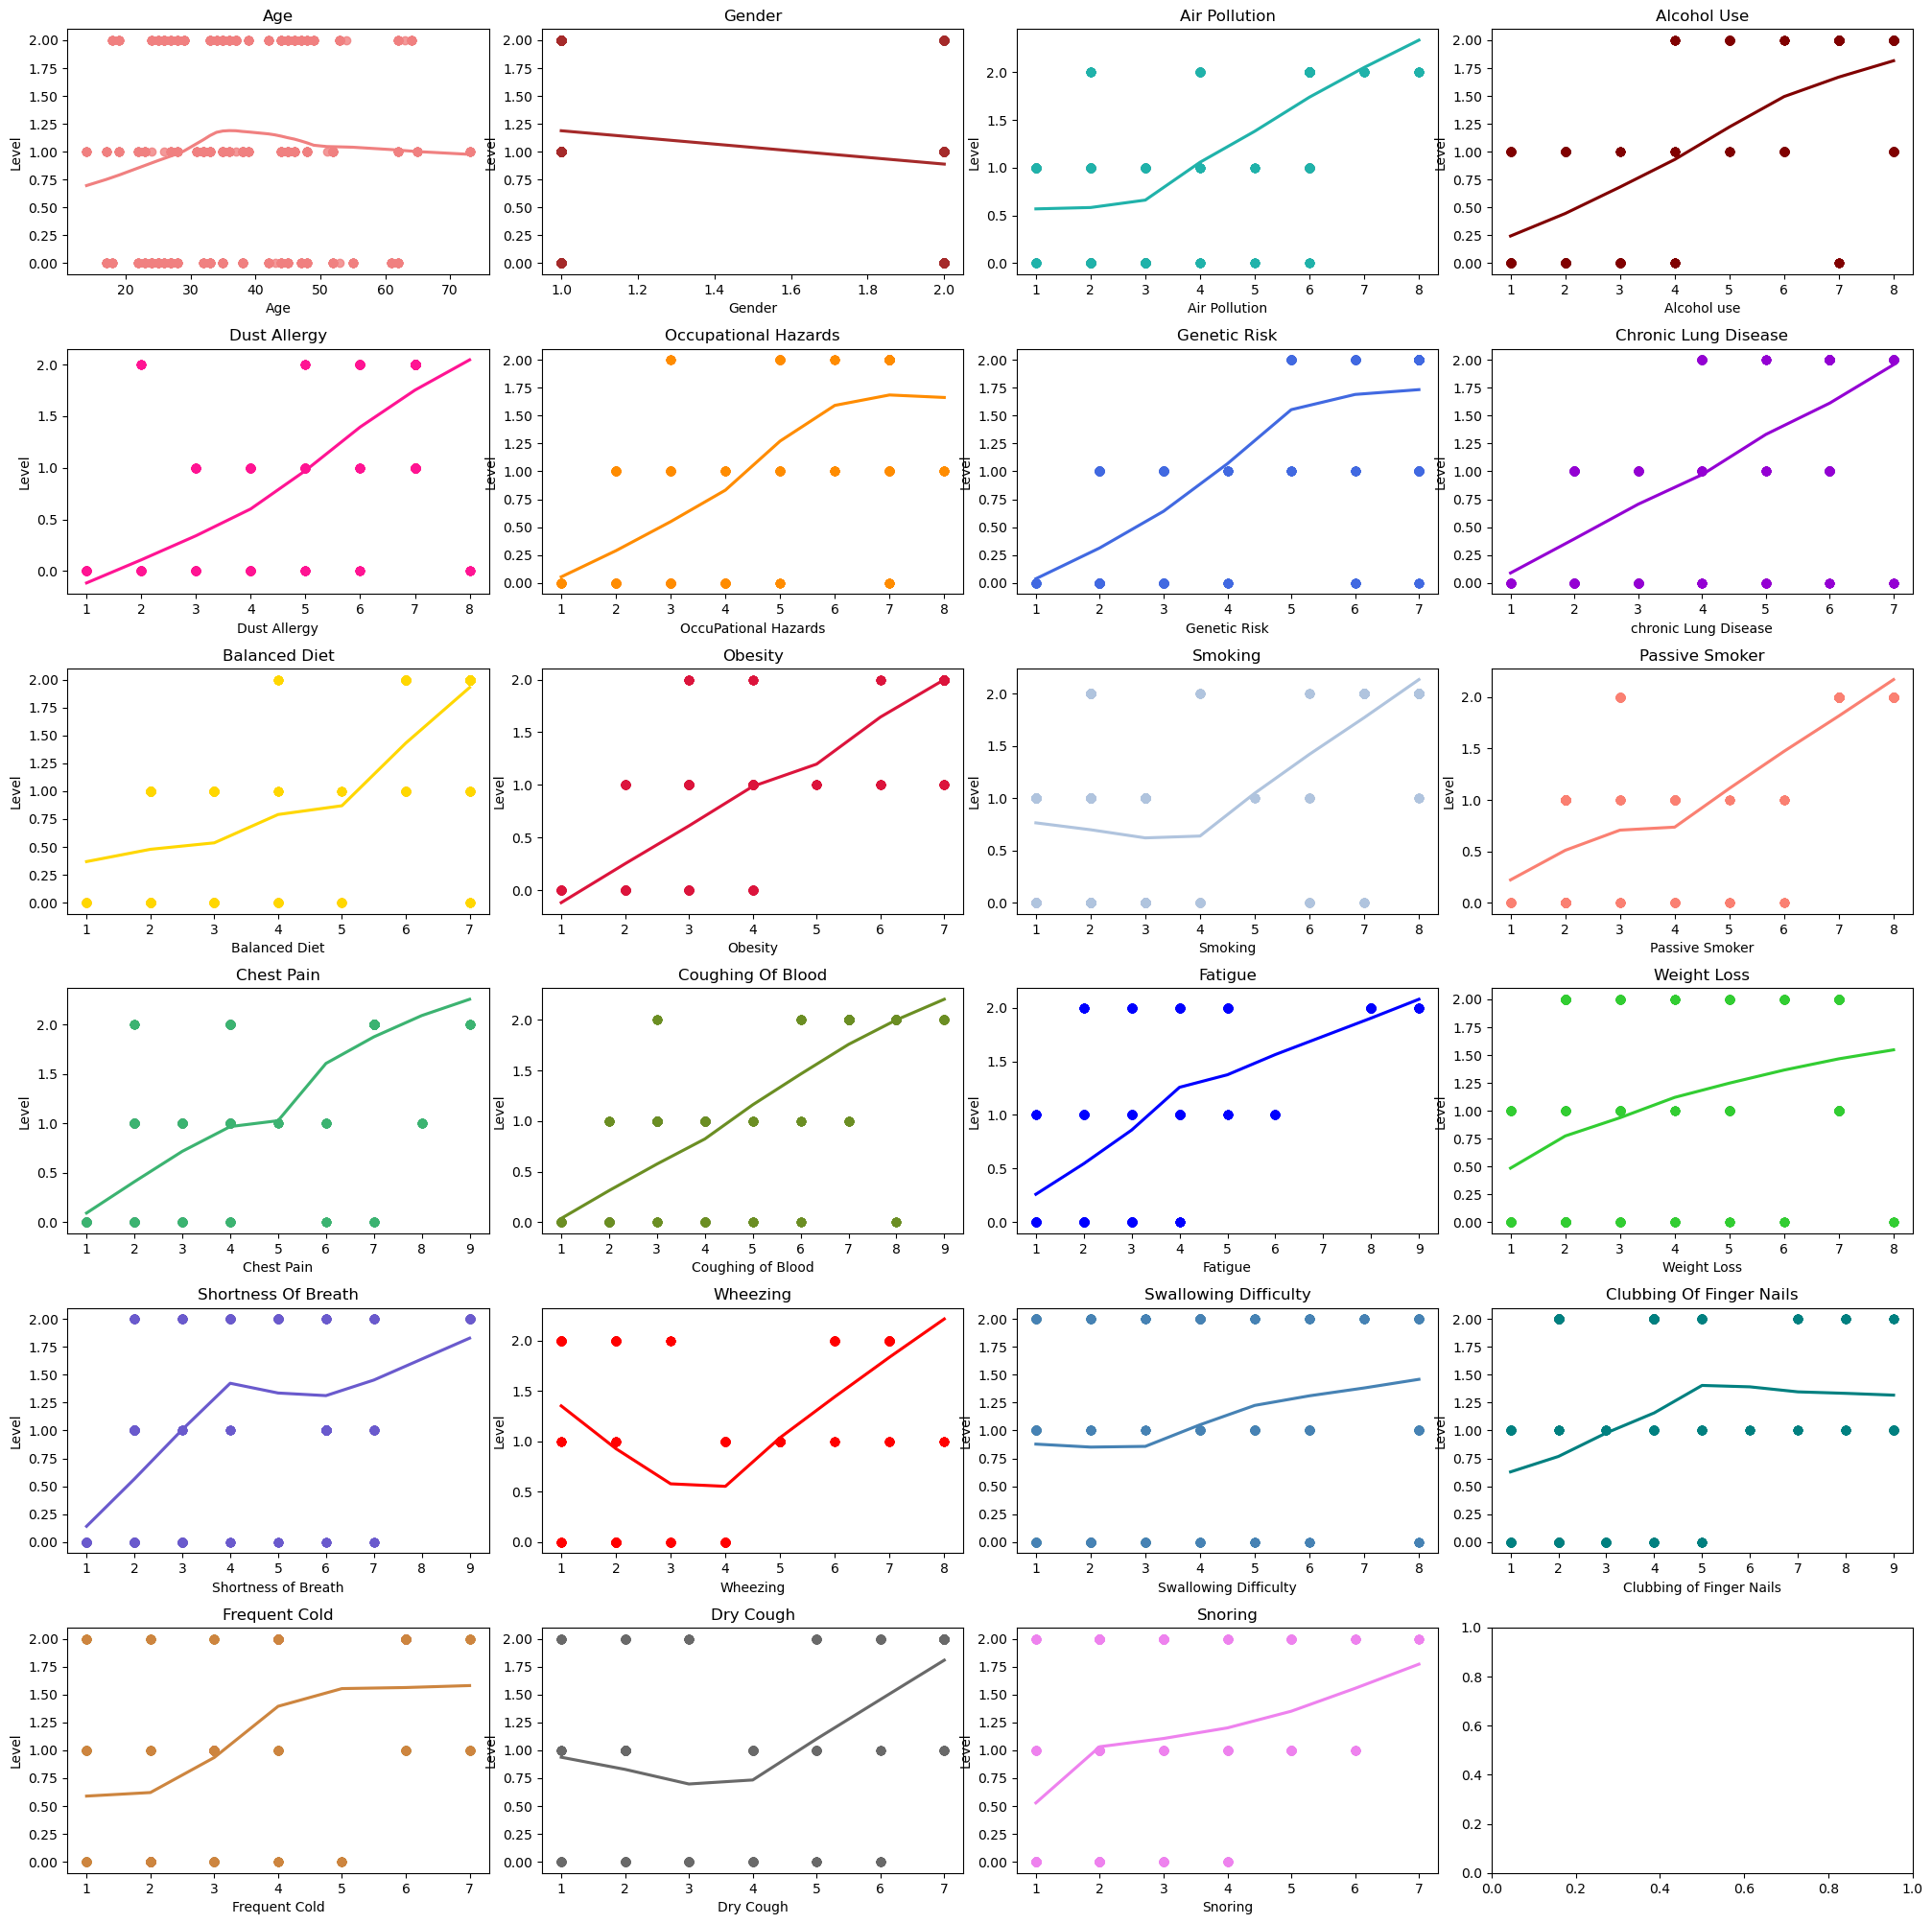

In [36]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

numeric_cols = df.select_dtypes(include='number').columns.drop('Level', errors='ignore')

for i, col in enumerate(numeric_cols):
    sns.regplot(
        x=col,
        y='Level',
        data=df,
        lowess=True,        
        color=colors[i % len(colors)],  
        ax=ax[i]
    )
    ax[i].set_title(col.title())
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Level')

plt.tight_layout(pad=0.5, w_pad=0.3, h_pad=1.0)
plt.show()

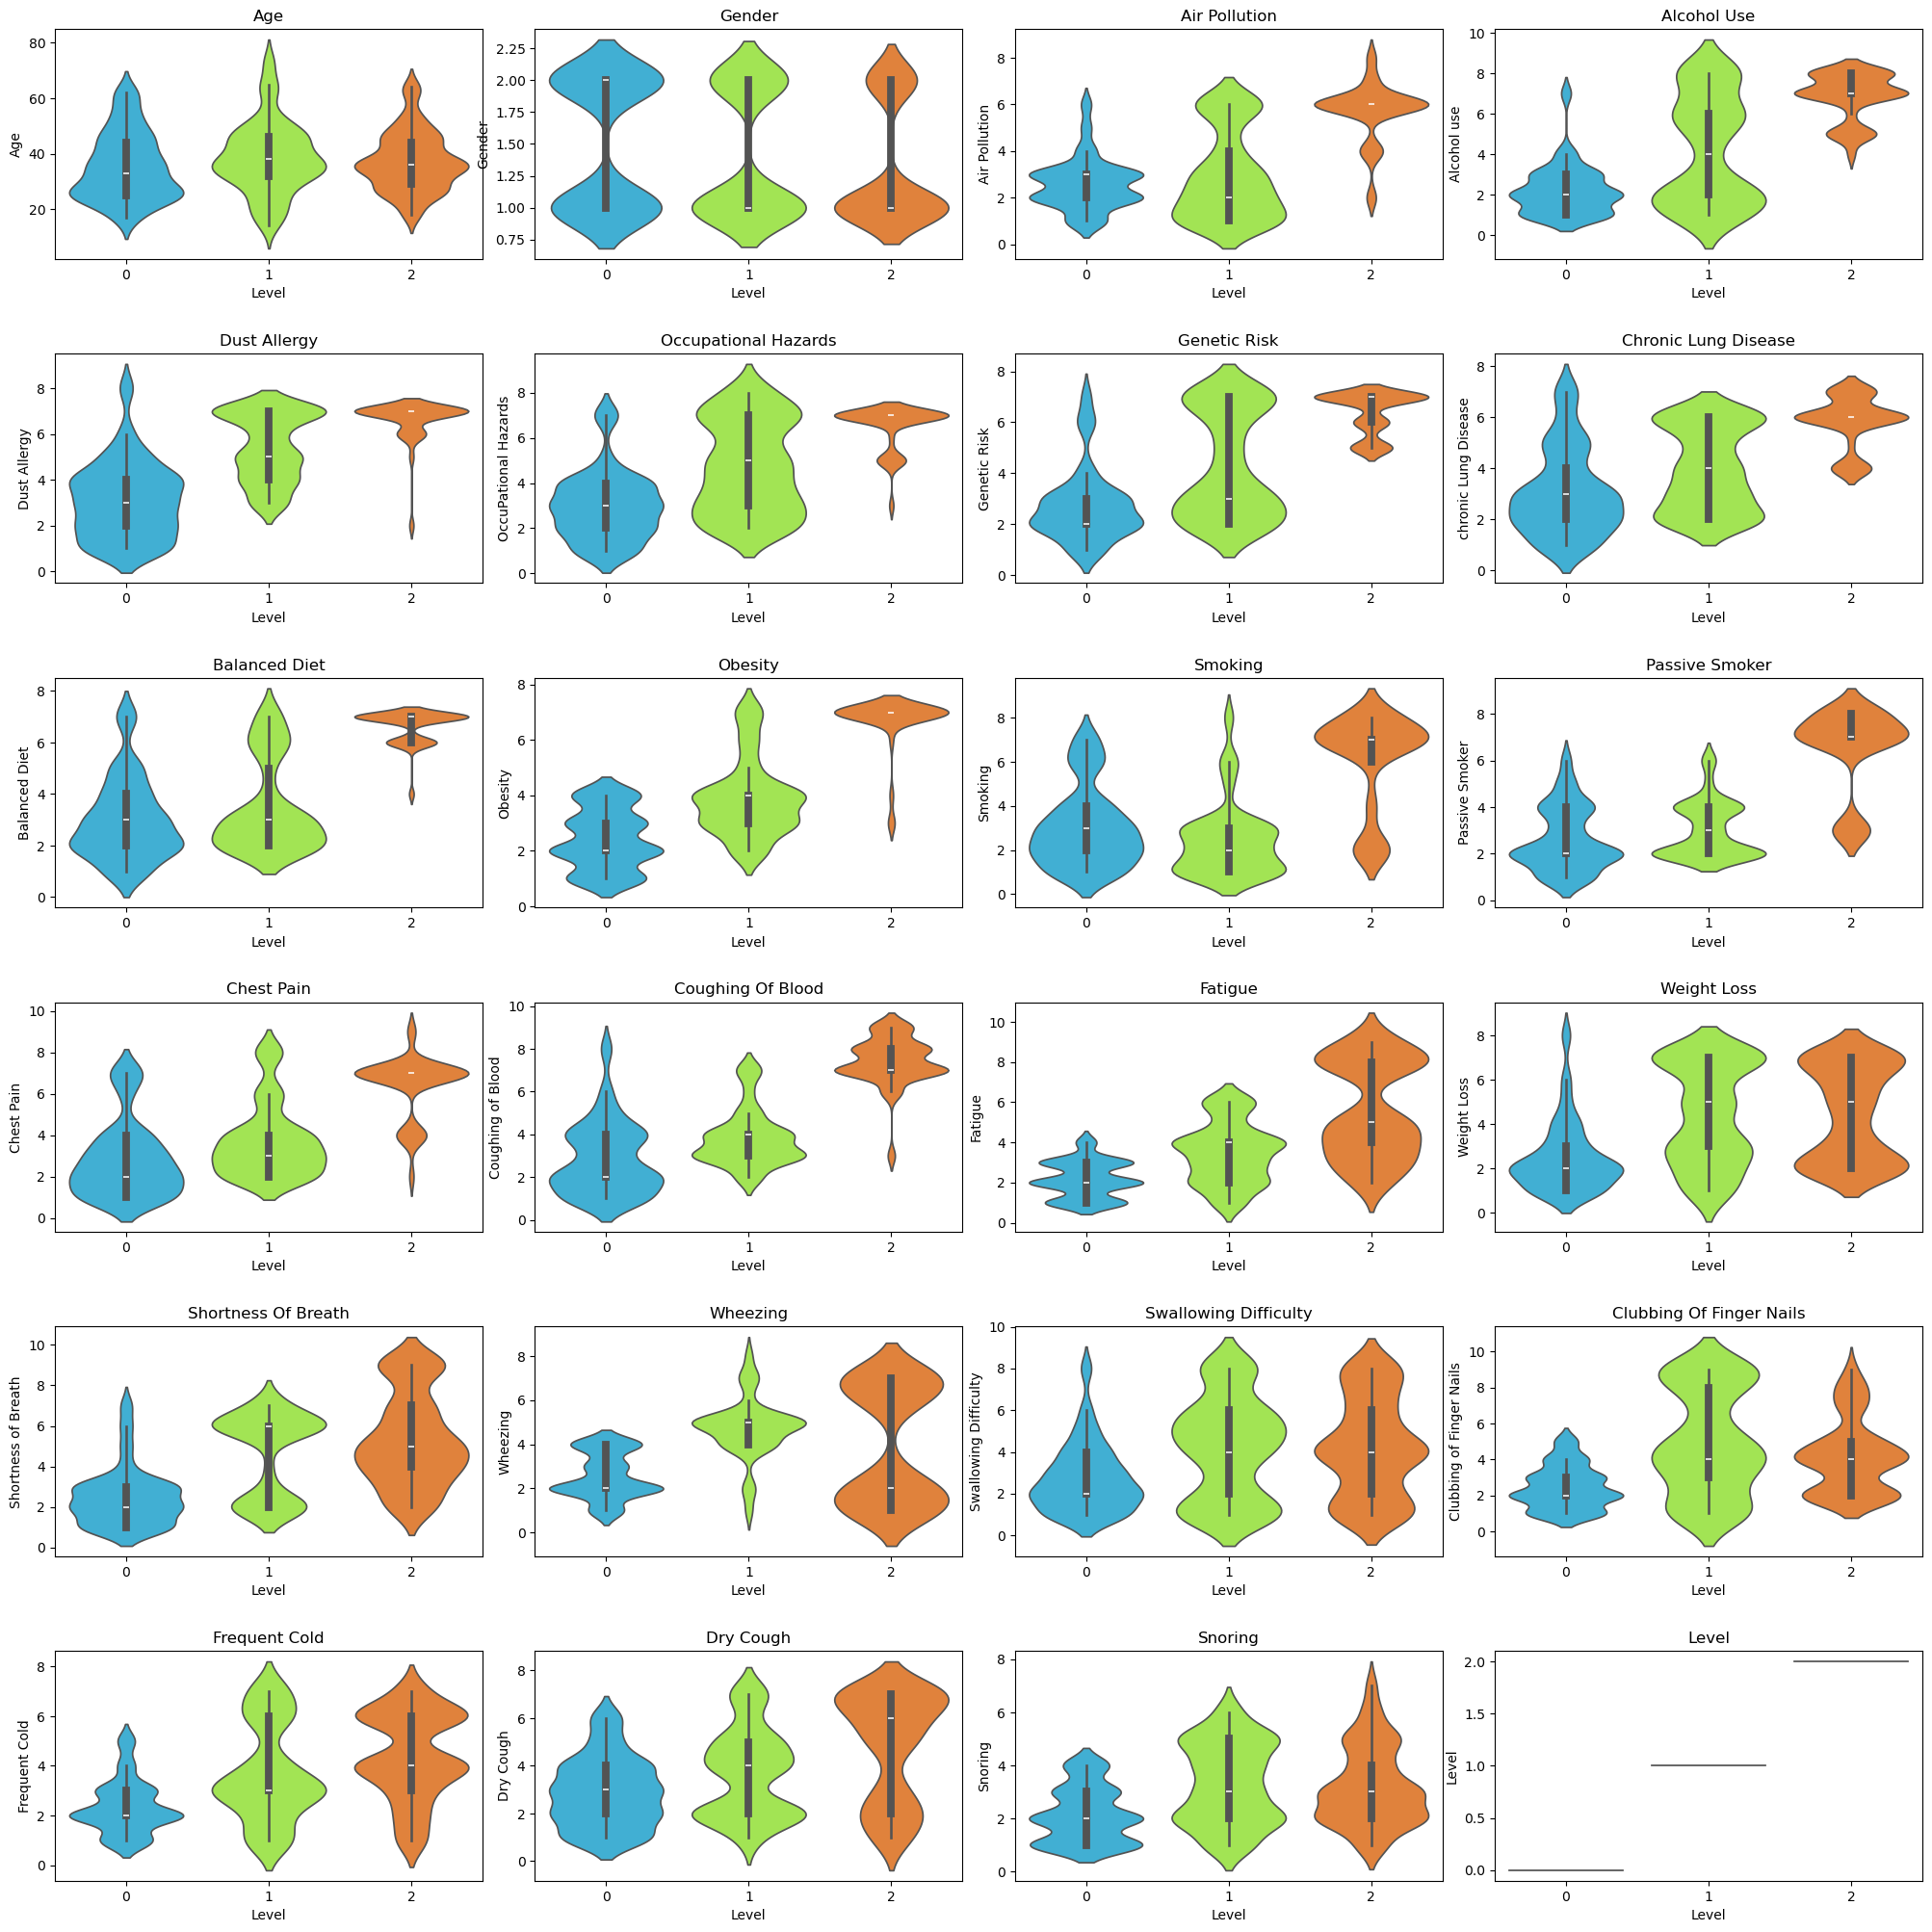

In [38]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.select_dtypes(include='number').columns):
    sns.violinplot(
        x=df['Level'],       
        y=df[col],          
        palette='turbo',       
        ax=ax[i]
    )
    ax[i].set_title(col.title())
    ax[i].set_xlabel('Level')
    ax[i].set_ylabel(col)

plt.tight_layout(pad=0.5, w_pad=0.2, h_pad=2.5)
plt.show()

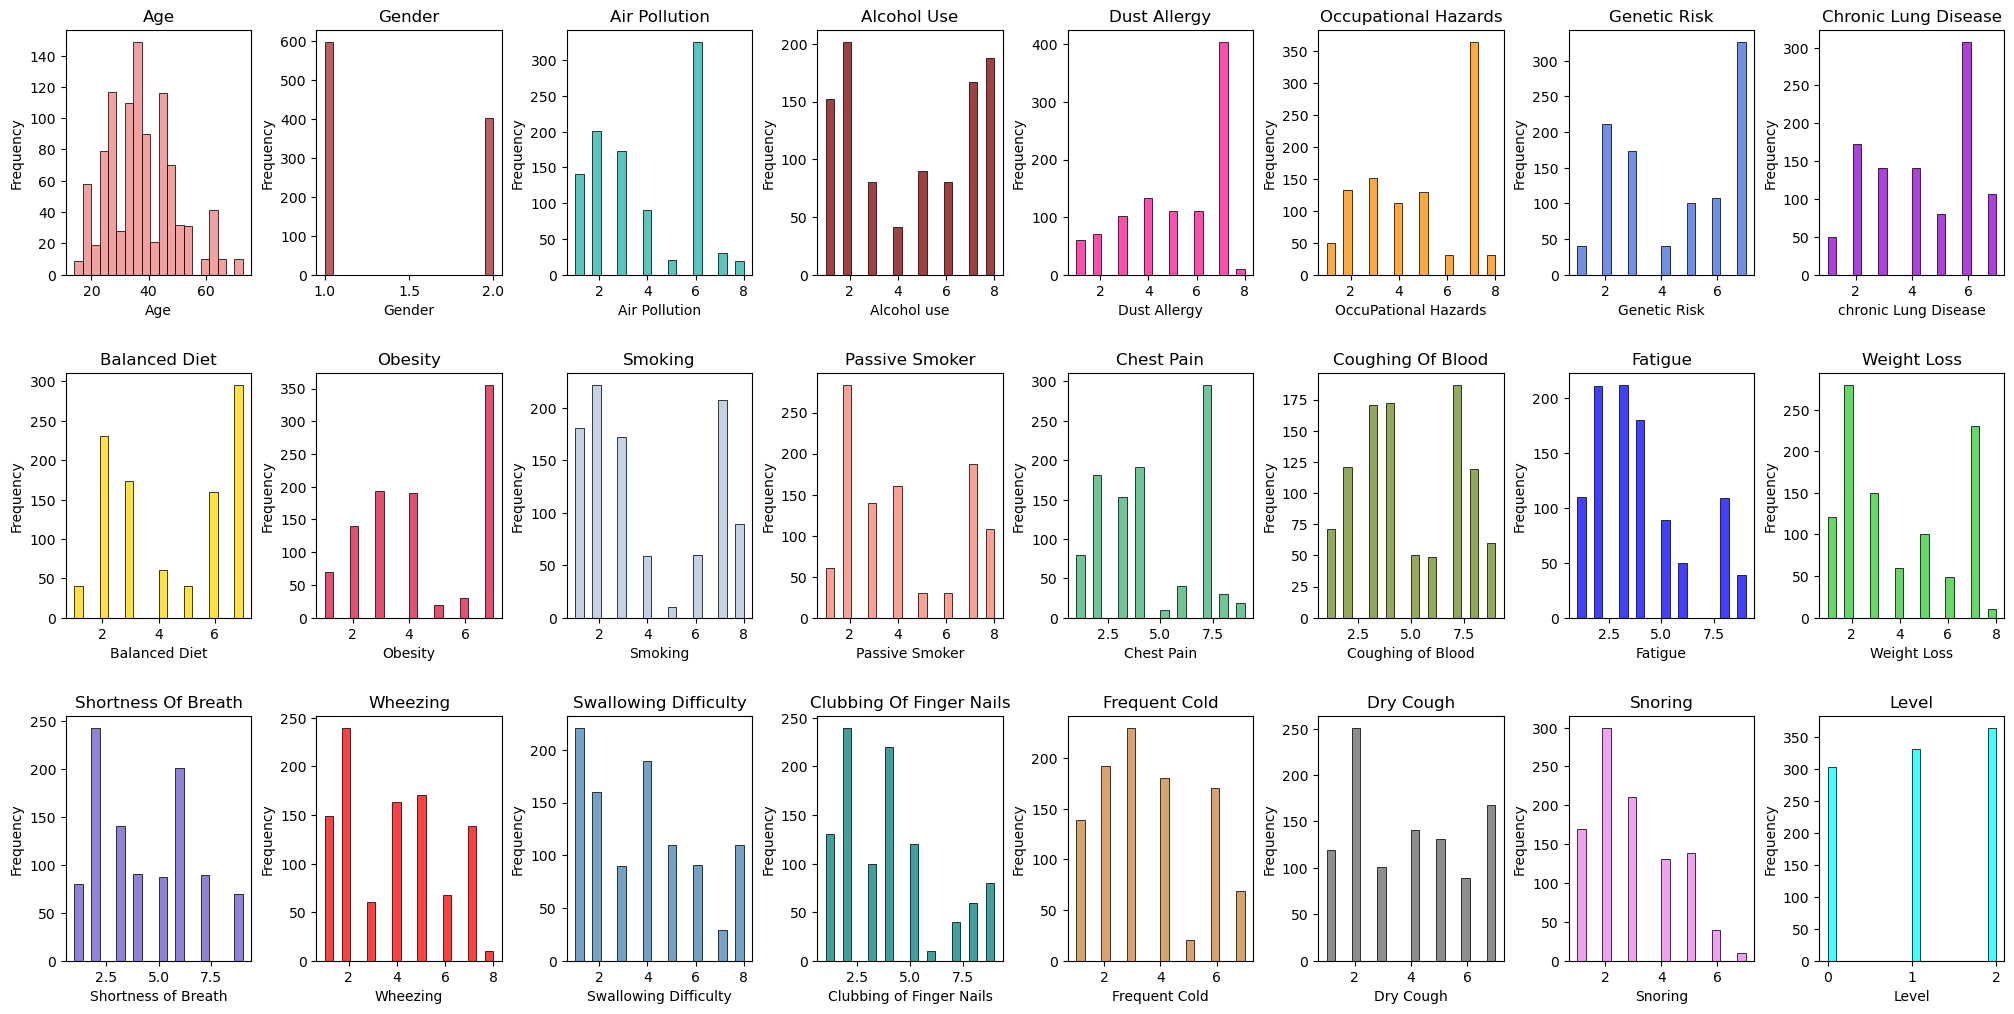

In [40]:
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()

i = 0
for col in df.select_dtypes(include='number').columns:
    sns.histplot(
        df[col],
        bins=20,
        color=colors[i],
        ax=ax[i]
    )
    ax[i].set_title(col.title())
    ax[i].set_xlabel(col)        
    ax[i].set_ylabel('Frequency')
    i += 1

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Training Testing Splitting</p>


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% training, 30% test

print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
Level
2    246
1    235
0    219
Name: count, dtype: int64


<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Multinomial Logistic Regression</p>


In [44]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42)

MR.fit(X_train, y_train)

MR_pred = MR.predict(X_test)

print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 36.19852435  -1.53797048 -34.66055386]
Coefficients: 
 [[-0.03822067  0.10663726 -0.17164488 -0.41487394 -0.26257352  0.05809541
  -0.47833233 -0.2325813  -0.03492463 -0.98337348 -0.01589747 -0.95497645
   0.30405342 -0.81310266 -0.72402099  0.06282322 -0.2606007  -0.92102551
  -0.82027806 -0.75452819 -0.62914962 -0.49110176 -0.71373962]
 [ 0.04939674 -0.1329262  -0.3202953  -0.20596885  0.43302603 -0.05544265
   0.27669744 -0.10935939 -0.28565138  0.50056564 -0.06255491  0.11407869
  -0.34252305 -0.00783964 -0.10620735 -0.40832836 -0.23105069  0.75780469
  -0.04480935  0.35040363  0.22915312  0.13583623  0.42722487]
 [-0.01117607  0.02628895  0.49194018  0.62084279 -0.17045251 -0.00265276
   0.20163489  0.34194069  0.32057601  0.48280784  0.07845238  0.84089776
   0.03846963  0.8209423   0.83022834  0.34550514  0.49165139  0.16322082
   0.86508741  0.40412456  0.3999965   0.35526552  0.28651475]]


In [46]:
def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.Blues):
    
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Confusion Matrix of Multinomial Model</p>


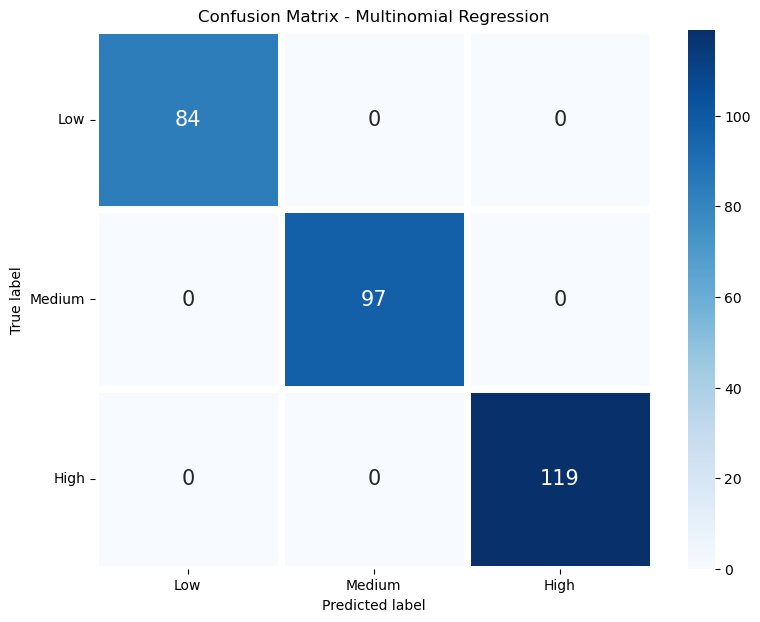

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [48]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')

ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Random Forest Classifier</p>


In [52]:
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):
    
    scores = []
    
    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=42)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    plt.plot(n_list, scores)
    plt.xlabel('Number of Estimators')
    plt.ylabel('Testing Accuracy')
    plt.title('Random Forest Accuracy vs n_estimators')
    plt.grid(alpha=0.1)
    plt.show()
        

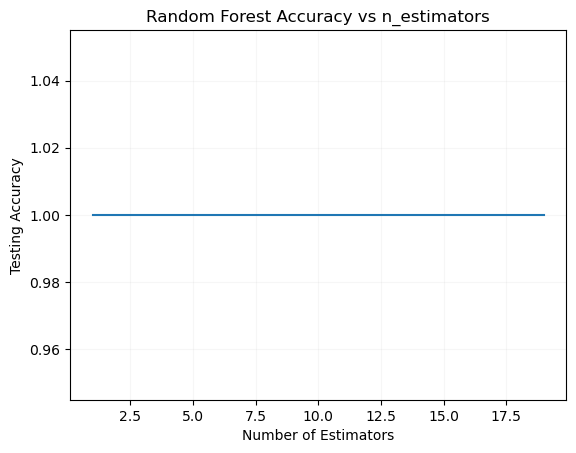

In [54]:
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

In [56]:

RF = RandomForestClassifier(n_estimators=3, random_state=42)

RF.fit(X_train, y_train)

RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

2    119
1     97
0     84
Name: count, dtype: int64

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Confusion Matrix of Random Forest Classifier</p>


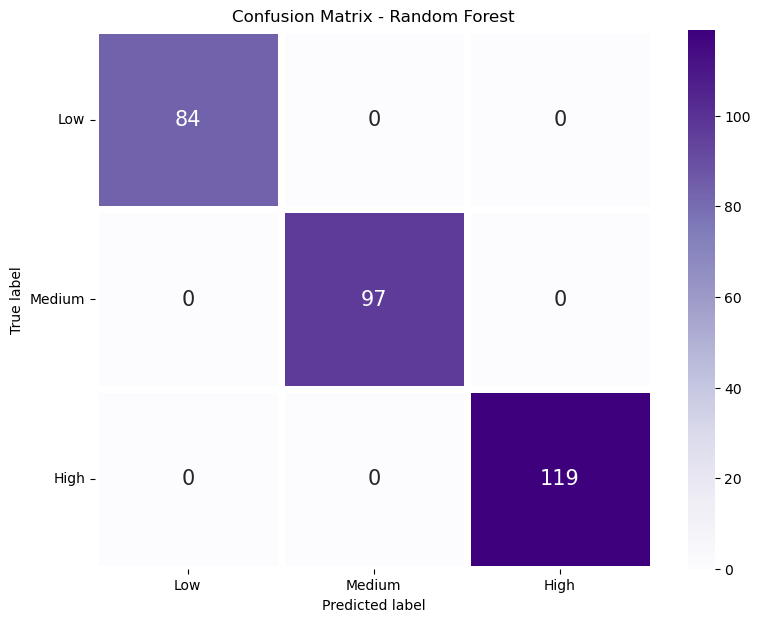

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [58]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='Purples')

ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

<p style="background-color:#000000;
          font-family:computermodern;
          color:#F8FAFC;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Gradient Boosting Classifier</p>


In [60]:
def gradient_boosting_n_best(X_train, y_train, X_test, y_test, n_list):
    scores = []

    for n in n_list:
        GB = GradientBoostingClassifier(n_estimators=n, random_state=42)
        GB.fit(X_train, y_train)
        y_pred = GB.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    plt.plot(n_list, scores, marker='o')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Testing Accuracy')
    plt.title('Gradient Boosting Accuracy vs n_estimators')
    plt.grid(alpha=0.2)
    plt.show()

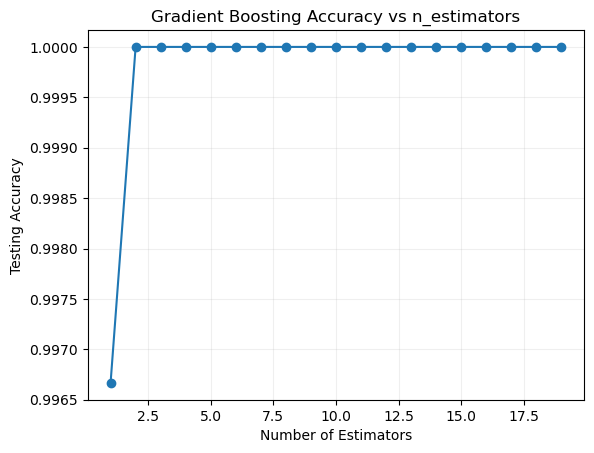

In [62]:
n_list = np.arange(1, 20, 1)
gradient_boosting_n_best(X_train, y_train, X_test, y_test, n_list)

In [64]:
GB = GradientBoostingClassifier(n_estimators=10, random_state=42) 

GB.fit(X_train, y_train)

GB_pred = GB.predict(X_test)

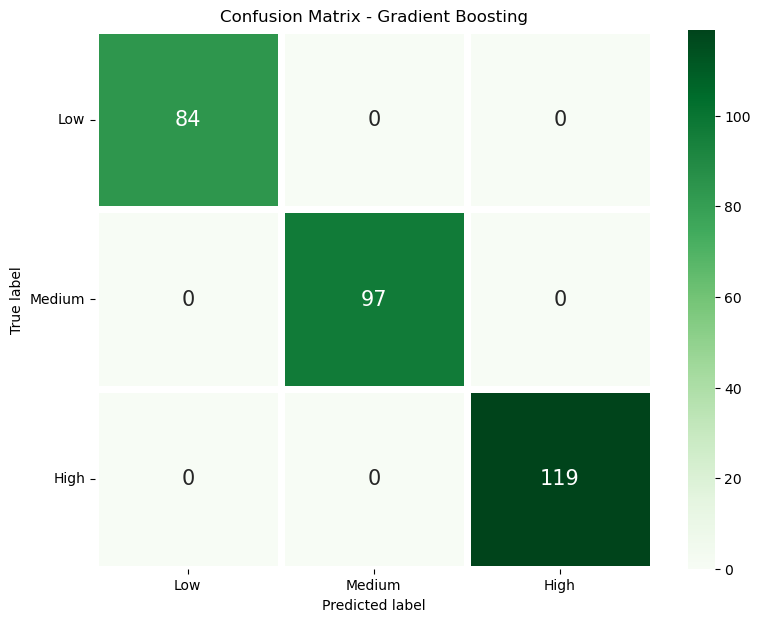

Overall Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [66]:

pd.Series(GB_pred).value_counts()

CM(y_test, GB_pred, col_names=['Low', 'Medium', 'High'], title='- Gradient Boosting', cmap='Greens')

gb_accuracy = accuracy_score(y_test, GB_pred)
print(f'Overall Accuracy: {gb_accuracy:.3f}')
print(classification_report(y_test, GB_pred))
